# CSE327 Homework 1

**Due date: 11:59pm Feb 20, 2022 (EST)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'CSE327-HW1-Spring22.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your practice only, you do not need to submit anything from this part.

In [15]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [16]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# Replace ------/-----/-----/' with the path such that "CSE327-HW1-Spring22" is your working directory
import os
%cd 'gdrive/MyDrive/CSE327/CSE327-HW1-Spring22/'
#%cd 'content/gdrive/MyDrive/CSE327/'
#%cd 'CSE327-HW1-Spring22/'
%ls

[Errno 2] No such file or directory: 'gdrive/MyDrive/CSE327/CSE327-HW1-Spring22/'
/content/gdrive/MyDrive/CSE327/CSE327-HW1-Spring22
CSE327-HW1-Spring22.ipynb  Results/  SourceImages/


In [18]:

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

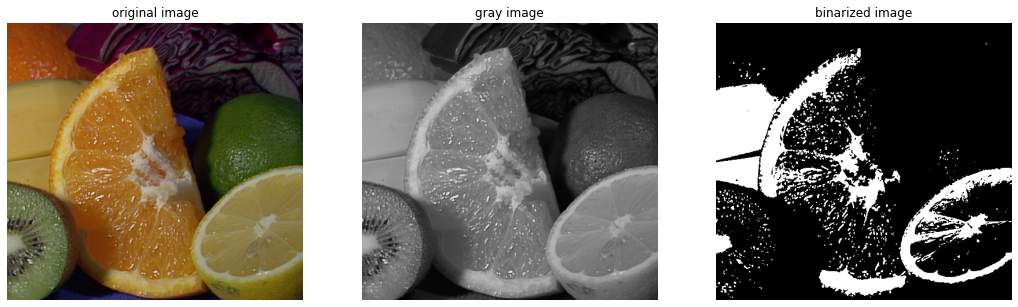

In [19]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/fruits.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important. This homework accounts for 100 points plus 25 **Bonus** points.

## Problems
---

- **Problem 1.a Gaussian convolution {15 pts}:** Write a function in Python that takes two arguments, a width parameter and a variance parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5 by 5 Gaussian kernel with sigma of 1. Repeat with a 11 by 11 Gaussian kernel with a sigma of 3. There will be four output images from this problem, namely, image convolved with 3x3, 11x11, noisy image convolved with 3x3, and 11x11. Once you fill in and run the codes, the outputs will be saved under Results folder. These images will be graded based on the difference with ground truth images. You might want to try the same thing on other images but it is not required. Include your notebook and the saved state where the output is displayed in the notebook.

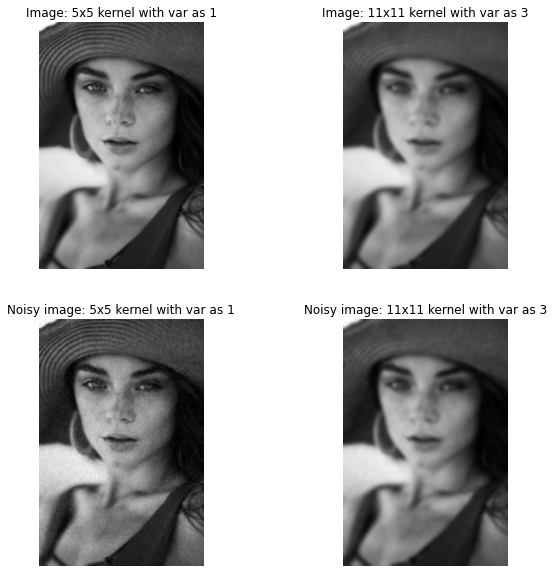

In [20]:
def genGaussianKernel(width, sigma):
    
    # define your 2d kernel here 
    x = [x-int(width/2) for x in range(width)] # Create std defined 1D array with difference of 1
    g = np.exp((np.square(x) / np.square(sigma))/-2) # Gauss formula 1D
    kernel = np.outer(g, g) #multiply 2 1D vectors to make 2D kernel => Seperability
    kernel = kernel / np.sum(kernel) # normalize
    return kernel

# Load images
img       = cv2.imread('SourceImages/pic.jpg', 0)
img_noise = cv2.imread('SourceImages/pic_noisy.jpg', 0)
img3 = cv2.imread('SourceImages/travis.png', 0)
# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)#Fill in your code here      # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3)#Fill in your code here      # 11 by 11 kernel with sigma of 3

# Convolve with image and noisy image

res_img_kernel1 = cv2.filter2D(src = img, ddepth = -1, kernel = kernel_1)
res_img_kernel2 = cv2.filter2D(src = img, ddepth = -1, kernel = kernel_2)
res_img_noise_kernel1 = cv2.filter2D(src = img_noise, ddepth = -1, kernel = kernel_1)
res_img_noise_kernel2 = cv2.filter2D(src = img_noise, ddepth = -1, kernel = kernel_2)

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()


- **Problem 1.b Median filter {15 pts}:** \\
(a)Write a function to generate an image with salt and pepper noise. The function takes two arguments, the input image and the probability that a pixel location has salt-pepper noise. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform()**) \\
(b)Write a function to implement a median filter. The function takes two arguments, an image and a window size(if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result.  \\
For this question display the outputs for "probabilty of salt and pepper noise" argument in the **noisy_image_generator** function equal to 0.1 and 0.2, and median filter window size in **median_filter** function equal to 5x5. \\
(c) What is the Gaussian filter size (and sigma) that achieves a similar level of noise removal.


In [21]:
# Function to generate image with salt and pepper noise
import copy
def noisy_image_generator(img_in, probability = 0.1):
  # define your function here
  # Fill in your code here
  img_out = copy.deepcopy(img_in)
  for r in range(len(img_out)):
    for c in range(len(img_out[r])):
      rand_num = np.random.uniform(0.0, 1.0)
      if(rand_num <= .1):
        #color pixel either black or white
        choose_rand_color =  np.random.uniform(0.0, 1.0)
        if(choose_rand_color <= .5):
          img_out[r][c] = 255 # white
        else:
          img_out[r][c] = 0 # black
  return img_out
  
# Function to apply median filter(window size kxk) on the input image  
def median_filter(img_in, window_size = 5):
  # define your function here
  # Fill in your code here
  # If you're at an edge, consider that edge as "-1"
  result = copy.deepcopy(img_in)
  for r in range(len(result)):
    for c in range(len(result[r])):
      curr_nums = []
      for mr in range(int(r - window_size/2), int(r + window_size/2)):
        for mc in range(int(c - window_size/2), int(c + window_size/2)):
          if((mr >= 0 and mr < len(result)) and (mc >= 0 and mc < len(result[r]))):
            curr_nums.append(img_in[mr][mc])
      curr_nums.sort()
      #print("Length of currnums should be <= 25: ", len(curr_nums))
      result[r][c] = curr_nums[int(len(curr_nums)/2)] # median
  return result
  
image_s_p1 = noisy_image_generator(img, probability = 0.1)  
result1 = median_filter(image_s_p1, window_size = 5)

image_s_p2 = noisy_image_generator(img, probability = 0.2)  
result2 = median_filter(image_s_p2, window_size = 5)

sp_gauss_kernel = genGaussianKernel(10,10)
image_s_p_gauss = cv2.filter2D(src = image_s_p1, ddepth = -1, kernel = sp_gauss_kernel)
cv2.imwrite("Results/P1_05.jpg", result1)    
cv2.imwrite("Results/P1_06.jpg", result2)    

# Plot results
plt.figure(figsize = (50, 40))
plt.subplot(1, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(result1, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(result2, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

#What is the Gaussian filter size (and sigma) that achieves a similar level of noise removal.
#Answer: width = 5, sigma = 2 ###<------------------------ANSWER TO PART C! -------------->
plt.figure(figsize = (20, 16))
plt.subplot(1, 5, 1)
plt.imshow(image_s_p_gauss, 'gray')
#plt.title('Image with noise_prob = .1 recovered after applying gauss filter of width = 5, sigma = 2')
plt.axis("off")

plt.show()

Output hidden; open in https://colab.research.google.com to view.

- **Problem 2 Separable convolutions {20 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

---



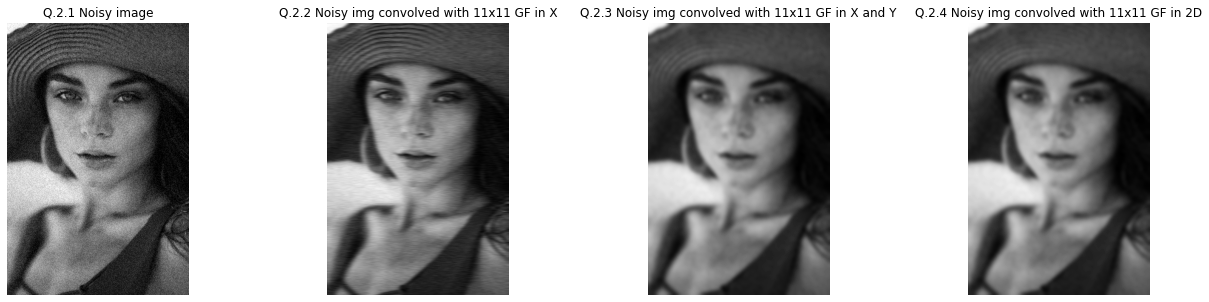

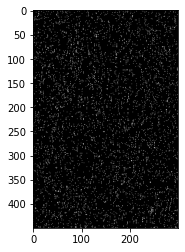

In [22]:
def genGausKernel1D(length, sigma):
    
    # define you 1d kernel here
    # Fill in your code here
    x = [x-int(length/2) for x in range(length)]
    g = np.exp((np.square(x) / np.square(sigma))/-2) # Gauss formula 1D
    #print("gauss = ", gauss)
    kernel_1d = g/np.sum(g) #multiply 2 1D vectors to make 2D kernel and normalize
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = np.atleast_2d(genGausKernel1D(width, sigma))
#print("Kernel_x : ", kernel_x)
kernel_y =  np.atleast_2d(genGausKernel1D(width, sigma)).T
#print("Kernel_y : ", kernel_y)

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma) 

# Convolve with img_noise
res_img_noise_kernel1d_x  = cv2.filter2D(src = img_noise, ddepth = -1, kernel = kernel_x)# Fill in your code here 
res_img_noise_kernel1d_xy = cv2.filter2D(src = res_img_noise_kernel1d_x, ddepth = -1, kernel = kernel_y)# Fill in your code here
res_img_noise_kernel2d    = cv2.filter2D(src = img_noise, ddepth = -1, kernel = kernel_2d)# Fill in your code here

# Plot results
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_noise, 'gray')
plt.title('Q.2.1 Noisy image')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x, 'gray')
plt.title('Q.2.2 Noisy img convolved with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy, 'gray')
plt.title('Q.2.3 Noisy img convolved with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d, 'gray')
plt.title('Q.2.4 Noisy img convolved with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array here

img_diff =  np.subtract(res_img_noise_kernel1d_xy, res_img_noise_kernel2d)

plt.gray()
plt.imshow(img_diff)



- **Problem 3 Laplacian of Gaussian {25 pts}:** Convolve a 23 by 23 Gaussian of sigma = 3 with the discrete approximation to the Laplacian kernel [1 1 1; 1 -8 1; 1 1 1]. Plot the Gaussian kernel and 2D Laplacian of Gaussian using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG. Do you see why this is referred to as the Mexican hat filter? Include your code and results in your Colab Notebook file. Apply the filter to the **Original image (img), Original image with Noise (img_noise), Original image filtered with 11x11 Gaussian kernel with var as 3 (Result image in Q1.a.2),  Original image with Noise filtered with 11x11 Gaussian kernel with var as 3 (Result image in Q1.a.4)**. Discuss the results in terms of edge accuracy and sensitivity to noise.

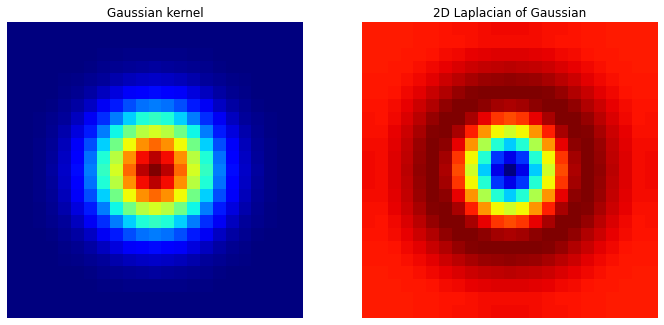

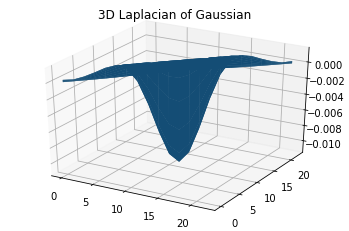

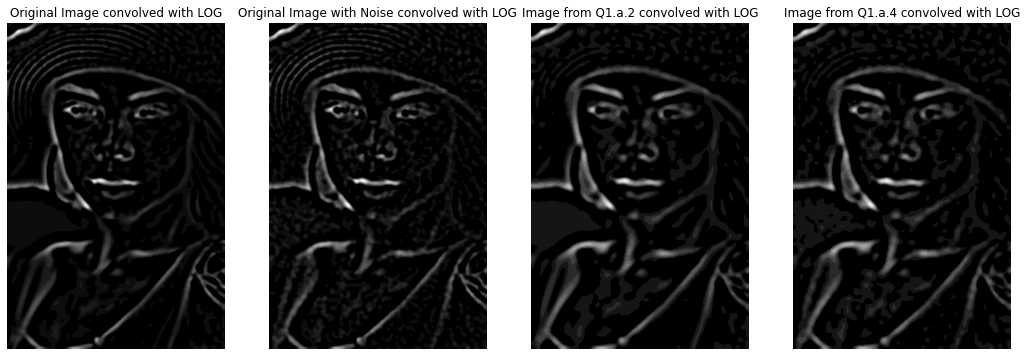

In [23]:
width = 23
sigma = 3

# Create your Laplacian kernel
Laplacian_kernel = np.asarray([[1,1,1],
                              [1,-8,1],
                              [1,1,1]])


# Create your Gaussian kernel
Gaussian_kernel = np.asarray(genGaussianKernel(23, 3))

# Create your Laplacian of Gaussian
LoG = cv2.filter2D(src = Gaussian_kernel, ddepth = -1, kernel = Laplacian_kernel)

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# Fill in your code here
plt.show()

img_LOG = cv2.filter2D(src = img, ddepth = -1, kernel = LoG)                # Fill in your code here
img_noise_LOG = cv2.filter2D(src = img_noise, ddepth = -1, kernel = LoG)# Fill in your code here
res_img_kernel2_LOG = cv2.filter2D(src = res_img_kernel2, ddepth = -1, kernel = LoG)# Fill in your code here
res_img_noise_kernel2_LOG = cv2.filter2D(src = res_img_noise_kernel2, ddepth = -1, kernel = LoG)   # Fill in your code here

# Plot the 3D figure of LoG
Y = [x for x in range(width)]
X = [x for x in range(width)]
Z = copy.deepcopy(LoG)
# Plot results

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z) 
plt.title('3D Laplacian of Gaussian')

# Plot results
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_LOG, 'gray')
plt.title('Original Image convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(img_noise_LOG, 'gray')
plt.title('Original Image with Noise convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_kernel2_LOG, 'gray')
plt.title('Image from Q1.a.2 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2_LOG, 'gray')
plt.title('Image from Q1.a.4 convolved with LOG')
plt.axis("off")

plt.show()


- **Problem 4 {25 pts}:** Implement the first two steps of the Canny edge extraction algorithm: cannyEnhancer(Gaussian filtering & finding magnitude and orientation of gradient) and nonMaxSuppression. Do not use any inbuilt library function for Canny edge detection. Include your code and results in your Colab Notebook file.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


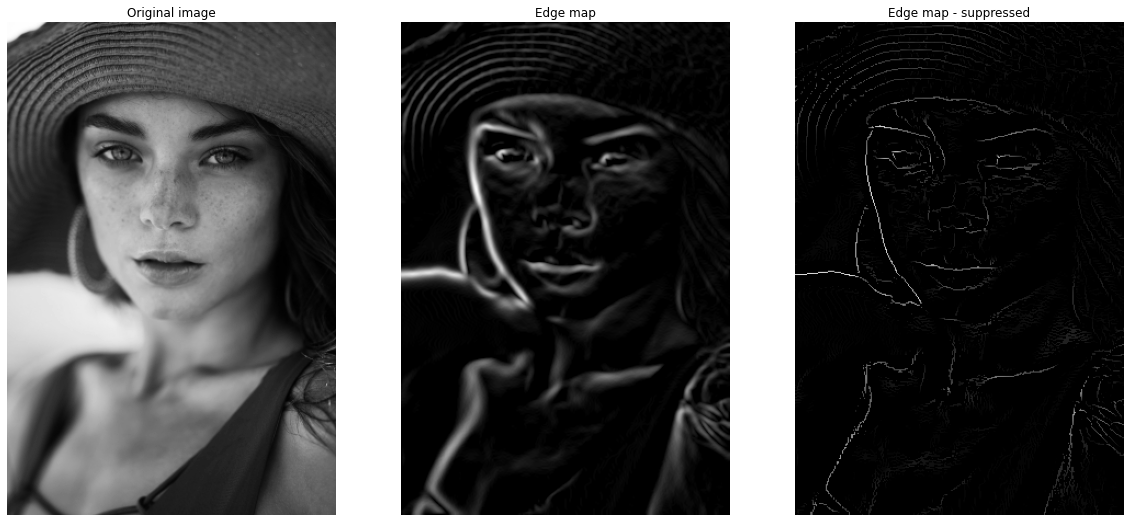

In [24]:
def cannyEnhancer(img):
    
    # Calculate edges in x and y direction
    # Return edge_map and grad_dir (gradient directions at each pixel location)
    canny_x = np.asarray([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])
    canny_y = np.asarray([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])
    img_gauss_filtered = cv2.filter2D(src = img, ddepth = -1, kernel = genGaussianKernel(25, 2))
    img_gauss_cx = cv2.filter2D(src = img_gauss_filtered, ddepth = -1, kernel = canny_x)
    img_gauss_cy = cv2.filter2D(src = img_gauss_filtered, ddepth = -1, kernel = canny_y)
    img_gauss_cxy = cv2.bitwise_or(img_gauss_cx, img_gauss_cy)
    img_gauss_cmag = np.hypot(img_gauss_cx, img_gauss_cy)
    img_gauss_cang = np.arctan(np.divide(img_gauss_cy, img_gauss_cx))

    edge_map = img_gauss_cmag
    grad_dir = img_gauss_cang
    combined = img_gauss_cxy 
    return np.asarray((edge_map), dtype=np.uint8), np.asarray((grad_dir), dtype=float)

def nonMaxSuppression(edge_map, grad_dir):
    
    # Fill in your code here
    # For each pixel location, look in the direction of gradient and suppress non-max values

    #Discretize gradients:
    grad_dir2 = copy.deepcopy(grad_dir)
    for r in range(len(grad_dir)):
      for c in range(len(grad_dir[r])):
        curr_angle = 0 if math.isnan(grad_dir[r][c]) else grad_dir[r][c] * 180/math.pi
        if curr_angle > -22.5 and curr_angle <= 22.5:
          grad_dir2[r][c] = 0
        elif curr_angle > 22.5 and curr_angle <= 67.5:
          grad_dir2[r][c] = 45
        elif curr_angle > 67.5 and curr_angle <= 90:
          grad_dir2[r][c] = 90
        elif curr_angle > -90 and curr_angle <= -67.5:
          grad_dir2[r][c] = 90
        elif curr_angle > -67.5 and curr_angle <= -22.5:
          grad_dir2[r][c] = 135
    #print("Gradient Angles: ", grad_dir2)

    #Suppress Non Maximal Noise:
    edge_map_supp = copy.deepcopy(edge_map)
    for r in range(len(edge_map_supp)):
      for c in range(len(edge_map_supp[r])):
        center = edge_map[r][c]
        if(grad_dir2[r][c] == 0):
          #Left and right
          left = 0
          right = 0
          try:
            left = edge_map[r][c-1]
            right = edge_map[r][c+1] 
          except Exception:
            pass
          if(center < left or center < right):
            edge_map_supp[r][c] = 0

        elif(grad_dir2[r][c] == 45):
          #top right, bottom left
          t_right = 0
          b_left = 0
          try:
            t_right = edge_map[r-1][c+1] 
            b_left = edge_map[r+1][c-1] 
          except Exception:
            pass
          if(center < b_left or center < t_right):
            edge_map_supp[r][c] = 0

        elif(grad_dir2[r][c] == 90):
          #top and bottom
          top = 0
          bottom = 0 
          try:
            top = edge_map[r-1][c] 
            bottom = edge_map[r+1][c] 
          except Exception:
            pass
          if(center < bottom or center < top):
            edge_map_supp[r][c] = 0

        elif(grad_dir2[r][c] == 135):
          #top left and bottom right
          t_left = 0
          b_right = 0
          try:
            t_left = edge_map[r-1][c-1] 
            b_right = edge_map[r+1][c+1] 
          except Exception:
            pass
          if(center < b_right or center < t_left):
            edge_map_supp[r][c] = 0
    return edge_map_supp


# Calculate Non-max suppression of edge map
edge_map, grad_dir = cannyEnhancer(img)
edge_map_supp = nonMaxSuppression(edge_map, grad_dir)
# Write out result images
cv2.imwrite("Results/P4_01.jpg", edge_map_supp)

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_map, 'gray')
plt.title('Edge map')
plt.axis("off")


plt.subplot(1, 3, 3)
plt.imshow(edge_map_supp, 'gray')
plt.title('Edge map - suppressed')
plt.axis("off")


plt.show()

- **[Bonus] Problem 5 Histogram equalization {25 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

True

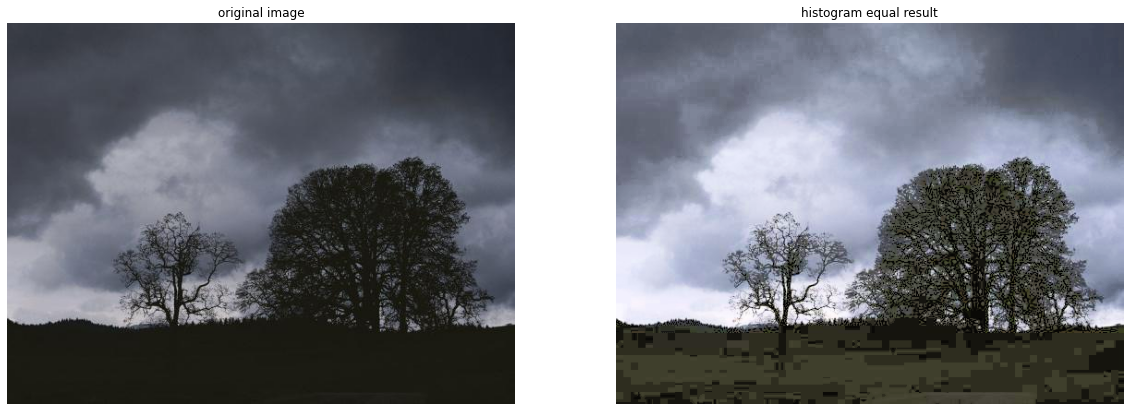

In [25]:
def histogram_equalization(img_in):

    # Write histogram equalization here
    # Fill in your code here
    HSV = cv2.cvtColor(img_in, cv2.COLOR_RGB2HSV) 
    img_in_hsv = HSV[:,:,2]
    total_pix = len(img_in_hsv)*len(img_in_hsv[0])
    hist = [0 for x in range(256)]
    
    for r in range(len(img_in_hsv)):
      for c in range(len(img_in_hsv[r])):
        hist[img_in_hsv[r][c]] += 1 #Get freq vals for hist
    pdf = np.true_divide(np.asarray(hist), total_pix) #pdf for hist
    cdf = [0 for x in range(256)]
    run_sum = 0
    for i in range(len(pdf)):
      run_sum+=pdf[i]
      cdf[i] = run_sum 
    #cdf found
    intensity_output = np.asarray(cdf)*255
    intensity = img_in_hsv
    for r in range(len(img_in_hsv)):
      for c in range(len(img_in_hsv[r])):
        intensity[r][c] = intensity_output[intensity[r][c]]
    #print("img out intensity: ", intensity)
    img_out = copy.deepcopy(HSV)
    img_out[:,:,2] = intensity
    img_out = cv2.cvtColor(img_out, cv2.COLOR_HSV2RGB) 
    return True, img_out

# Read in input images
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)

# Histogram equalization

succeed, output_image = histogram_equalization(img_equal)

# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")


# Plot results2
plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", output_image)



## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through blackboard. This pdf file should be named as **Surname_Givenname_SBUID_hw*.pdf** (example: Jordan_Michael_111134567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw*.*** (example: Jordan_Michael_111134567_hw1 for this assignment) in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Jordan_Michael_111134567_hw1
        |---Results
        |---SourceImages
        |---Jordan_Michael_111134567_hw1.ipynb
        |---Jordan_Michael_111134567_hw1.pdf
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link (with edit access)***, in the People textfield, enter the TA's email: ***yfulwani@cs.stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
